## **Informe final de carrera Acámica *Data Science***

### **Series de tiempo: una primera aproximación a redes neuronales**

En este informe se ensayan modelos de redes neuronales para efectuar predicciones a partir de la serie de tiempo. Este proyecto sólo representa una primera aproximación al uso de redes neuronales para efectuar predicciones a futuro, y en todos los casos se usan redes muy sencillas (poco profundas) con baja optimización. El proceso de optimización es complejo, y por el momento excede mis capacidades. De todas formas, quería intentar implementar el uso de redes neuronales para dar mis primeros pasos en el tema, y ver los resultados que pueden obtenerse con estos modelos, comparando con otros modelos más tradicionales que fueron evaluados oportunamente en el Proyecto 3.

**IMPORTANTE**: para correr el siguiente código y obtener resultados reproducibles, se requieren los modelos de redes neuronales ya entrenados, que fueron guardados. Esos archivos se encuentran disponibles en el repositorio de GitHub (el link se encuentra debajo).

Adicionalmente, para correr el siguiente código se requiere, además de otras librerías estándar vistas en la carrera, tener instalado Tensorflow Keras.

#### Link para repositorio en GitHub del Informe final de carrera:

https://github.com/felipejaw/informe_final_ds

#### Link para repositorio en GitHub del Proyecto 3:

https://github.com/felipejaw/proyecto_series_tiempo

En primer lugar se importan librerías de uso general, y se pre-procesa el Dataset tal cual se hizo en el Proyecto 3, de forma tal de contar con DataFrame con la circulación diaria de la autopista Illia para los años 2017, 2018 y 2019.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
data_2019 = pd.read_csv('Datasets/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('Datasets/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('Datasets/flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [6]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

In [7]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
dataset2=dataset.copy()
mask = np.logical_and(dataset2.estacion=='Illia', dataset2.forma_pago == 'EFECTIVO')
dataset2 = dataset2[mask]

#Quitamos las columnas que no vamos a utilizar
dataset2.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset2.head()

,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [8]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset2['fecha2'] = pd.to_datetime(dataset2.fecha) + pd.to_timedelta(dataset2.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset2.drop(columns=['fecha','hora_fin'], inplace = True)

dataset2.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha2
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [9]:
#Corregimos el nombre de fecha2 a fecha
dataset2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset2.head()

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
80,Martes,Centro,Liviano,537,2019-01-01 02:00:00
86,Martes,Centro,Pesado,1,2019-01-01 02:00:00
88,Martes,Provincia,Liviano,443,2019-01-01 02:00:00
94,Martes,Provincia,Pesado,1,2019-01-01 02:00:00
149,Martes,Centro,Liviano,769,2019-01-01 03:00:00


In [10]:
#Reordenamos el dataset por fecha
dataset2.sort_values('fecha', inplace = True)
dataset2.reset_index(drop=True, inplace = True)
dataset2

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


In [11]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset2.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


#### **Modelo DNN (*Deep Neural Network*)**

Las DNNs son redes del tipo *feed forward*, es decir, en donde los datos siempre fluyen unidireccionalmente desde la capa de entrada (*input layer*) a la capa de salida (*output layer*), pasando por una o más capas internas (*inner layers*). La cantidad de *inner layers* determina la profundidad de la red. A continuación, se creará una red neuronal poco profunda, con sólo una capa oculta, para intentar predecir el comportamiento de la serie de tiempo.

En primer lugar, se crea una función que permite transformar los datos, de manera tal que cada fila represente una secuencia de un determinado número de registros (definido en la función por el *look_back*).

In [12]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X), np.array(Y)

Se generan los datos de testeo y entrenamiento. Se usa el 80% de los datos para entrenar, y el restante 20% para testear. También se define cuántos registros diarios se usarán para efectuar la predicción *one-step* (*look_back*). Luego se aplica la función previamente definida para pasar los datos a una matriz de entrada para la red neuronal.

In [13]:
train_size = round(1095*0.799)
train, test =diario.values[0:train_size,:],diario.values[train_size:len(diario.values),:]

look_back = 110

trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

Se define una función para crear la estructura de la red neuronal con 3 capas de neuronas densamente conectadas:

- capa de entrada (*input layer*): tiene 16 outputs (*units*). Como elemento de entrada tendrá un array 1D, indicándole con el argumento *input_dim* cuántos elementos posee en única dimensión. Como función de activación se le asigna ReLU (unidad lineal rectificada), que es computacionalmente eficiente y permite *back-propagation*.

- capa oculta (*inner layer*): tiene 8 outputs (*units*). Recibirá los outputs de la capa de entrada. Como función de activación también se le asigna ReLU.

- capa de salida (*output layer*): tiene un único output, que es la predicción que buscamos. Recibirá los outputs de la capa oculta. En este caso, como función de activación se usa una función lineal (por defecto en Keras al no especificarse).

El sistema de tres capas con 32, 8 y 1 output le permite a la red "pensar" ampliamente en un comienzo, para luego converger en la predicción en cuestión.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

/Users/felipemartinjaworski/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/felipemartinjaworski/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/felipemartinjaworski/opt/anaconda3/envs/deeplearning/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtyp

Se crea el modelo usando la función arriba descripta, y se entrena al modelo con los vectores de trainX y las etiquetas de trainY. Se determina *epochs*=100 para que los datos de entrenamiento pasen 100 veces a través de la red, para entrenarla y alterar los pesos las unidades neuronales. Se usa *EarlyStopping* para indicar que se deje de entrenar a la red en caso de no verse mejoras en el modelo en términos de rendimiento (en este caso medido por MSE (se indicó en la función precedente *loss*=*'mean_squared_error*).

**IMPORTANTE**: debido a la naturaleza estocástica de los modelos de redes neuronales, en cada entrenamiento los pesos iniciales difieren, y por eso tiende a llegarse a resultados diferentes. Por tal motivo, a fines de permitir una mejor correción de este proyecto, se carga el modelo a partir de un archivo JSON y los pesos del modelo, que fueron previamente generados con la corrida de este *notebook* (ver debajo el código para guardar el modelo generado). Por este motivo, se deja comentada la primera celda a continuación, y se deja que se corra la celda subsiguiente con la carga del modelo.

In [15]:
# model=model_dnn(look_back)

# history=model.fit(trainX,trainY, epochs=100,
#                   batch_size=30, verbose=0, validation_data=(testX,testY),
#                   callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
#                   shuffle=False)

In [16]:
# Se carga archivo json y se crea el modelo

from tensorflow.keras.models import model_from_json

json_file = open('modelDNN.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# Se cargan los pesos al modelo
model.load_weights("modelDNN.h5")
print("Se cargó el modelo")

model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
print("Se compiló el archivo")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Se cargó el modelo
Se compiló el archivo


Se crea una función para graficar la curva de aprendizaje, es decir, las mejoras en la métrica elegida conforme aumenta el número de epoch (ciclo de entrenamiento de la red). La función comentada es la que se usó para la ejecución del código de novo, mientras que la restante está levenmente modificada para su uso a partir de la carga del modelo previamente guardado.

In [17]:
# def model_loss(history):
#     plt.figure(figsize=(8,4))
#     plt.plot(history.history['loss'], label='Train Loss')
#     plt.plot(history.history['val_loss'], label='Test Loss')
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epochs')
#     plt.legend(loc='upper right')
#     plt.show();

In [18]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

Se calculan el RMSE (error cuadrático medio) y el MAE (error cuadrático medio) como métricas de error, que miden cuánto se desvían las predicciones de los valores reales de las etiquetas, y por lo tanto permiten evaluar nuestros modelos. Un valor más bajo resulta en un mejor poder predictivo del modelo, ya que tanto menor serán las desviaciones de las predicciones en relación al valor real de la etiqueta. Estas métricas son apropiadas para este caso, ya que se trata de un problema de regresión (y no de clasificación).

Puede verse que se obtiene un RMSE de 5.535 para los datos de entrenamiento y un RMSE de 5.071 para los datos de testeo. El MAE resultó de 3.800 y 3.657, respectivamente. Estos valores no son estrictamente comparables con los obtenidos previamente, ya que en el Proyecto 3 se generaron modelos *multi-step* para predecir múltiples valores a futuro simultáneamente. En este caso, se trata de un modelo *one-step*, en donde a partir de 110 valores (cada fila generada con la función *covert2matrix()*), se predice el flujo de tránsito para el día inmediatamente posterior. Teniendo eso en mente, y observando que el RMSE obtenido es comparable (e incluso superior) al registrado para los modelos del Proyecto 3, el poder predictivo de esta sencilla red neuronal es inferior. Quizás podrían obtenerse mejores resultados si se incluyera una serie temporal más larga, con más años implicados. Obviamente, también podrían obtenerse mejores resultados optimizando la estructura e hiperparámetros de la red neuronal.

Luego se grafica la curva de aprendizaje, pudiendo visualizarse cómo disminuye la métrica de error conforme aumenta el número de epoch.

In [19]:
# Se carga el objeto history para recuperar los valores de loss y val_loss
# que habían sido generados al entrenarse el modelo.

import pickle

history = pickle.load(open('trainHistoryDictDNN', "rb"))

Train Root Mean Squared Error(RMSE): 5535.59; Train Mean Absolute Error(MAE) : 3800.04 
Test Root Mean Squared Error(RMSE): 5071.37; Test Mean Absolute Error(MAE) : 3657.96 


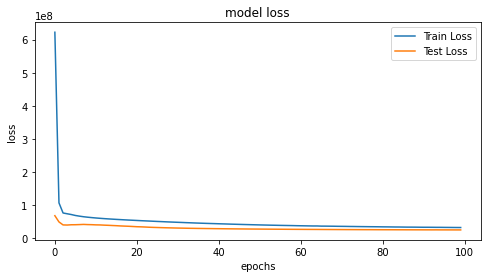

In [20]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)

Finalmente, se grafican las predicciones del modelo para los 110 días subsiguientes (siempre en formato *one-step*. Se observa que el modelo generaliza sensatamente la variación semanal en el flujo de tránsito.

In [21]:
def prediction_plot(testY, test_predict):
    len_prediction=[x for x in range(len(testY))]
    plt.figure(figsize=(8,4))
    plt.plot(len_prediction, testY, marker='.', label="Real")
    plt.plot(len_prediction, test_predict, 'r', label="Predicción")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Cantidad de pasos diaria', size=15)
    plt.xlabel('Tiempo (días)', size=15)
    plt.legend(fontsize=15)
    plt.show();

In [22]:
test_predict = model.predict(testX)

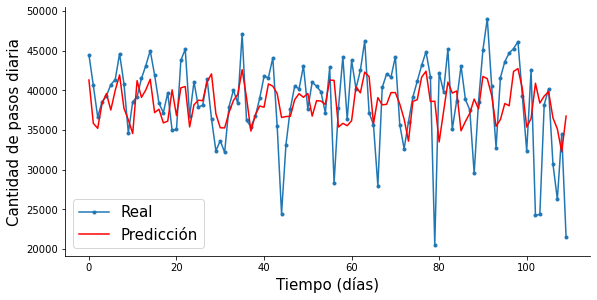

In [23]:
prediction_plot(testY, test_predict)

Debido a la naturaleza estocástica de las redes neuronales, en cada entrenamiento los pesos iniciales difieren, y por eso tiende a llegarse a resultados diferentes. Por tal motivo, con la siguiente celda de código se guarda el modelo y sus pesos, de forma tal de volver a cargarlo en futuras ejecuciones del *notebook*. 

Adicionalmente, en la celda siguiente, se guarda el objeto *history*, que almacena los valores para *loss* y *val_loss* de los sucesivos epochs que se generaron al ejecutarse el método *model.fit()*, de forma tal de recuperarlos en una futura ejecución del *notebook*.

In [24]:
# model_json = model.to_json()
# with open("modelDNN.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("modelDNN.h5")
# print("Saved model to disk")

In [25]:
# import pickle

# with open('trainHistoryDictDNN', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)

A continuación, se deja correr el modelo a partir de sus propios valores de *output*. Es decir, se hacen 110 iteraciones adicionales que serán valores generados a partir de predicciones previas. Las predicciones para el conjunto de testeo fueron realizadas de manera *one-step*, utilizando 110 valores de pasos reales; las nuevas predicciones estarán basadas en estas predicciones *one-step*, pero se irán acumulando predicciones de tipo *multi-step*, en donde las nuevas predicciones estarán generadas tomando como verdaderas las predicciones previas.

In [26]:
for k in range(110):
    fb_data = np.reshape(test_predict[len(test_predict)-look_back:],(1,look_back))
    new_pred = model.predict(fb_data).flatten()
    test_predict = np.append(test_predict, new_pred)

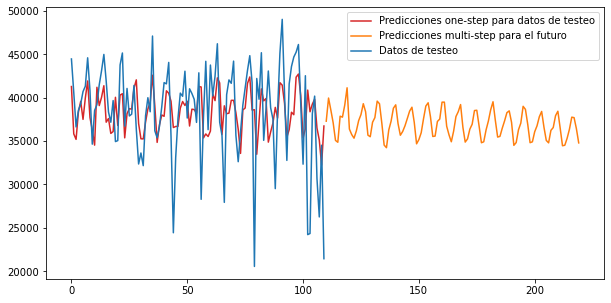

In [27]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,110),test_predict[0:110],color='tab:red',label='Predicciones one-step para datos de testeo')
plt.plot(np.arange(110,110+look_back),test_predict[110:],color='tab:orange',label='Predicciones multi-step para el futuro')
plt.plot(np.arange(0,110),testY,color='tab:blue',label='Datos de testeo')
plt.legend()
plt.show()

Se obtiene un modelo que logra capturar la estacionalidad de los datos, al observarse las fluctuaciones semanales de los datos. Sin embargo, tiende a oscilar poco en torno a la media, en comparación con los datos reales, que muestran valores más alejados de la media. Además, el modelo tiende a fluctuar poco en torno a la media, y no necesariamente los datos mostrarán ese comportamiento en el futuro. A continuación, corroboro esto recuperando los datos de 2020, y graficando los datos de los primeros días de dicho año (hasta la pandemia) para poder compararlos con las predicciones *multi-step*.

In [28]:
data_2020 = pd.read_csv('Datasets/flujo-vehicular-2020.csv', sep =',')
filtro=data_2020.forma_pago == 'Efectivo'
data_2020.forma_pago=np.where(filtro,'EFECTIVO',data_2020.forma_pago)
filtro=data_2020.estacion == 'ILLIA'
data_2020.estacion=np.where(filtro,'Illia',data_2020.estacion)
dataset3 = pd.concat([data_2020, data_2019, data_2018, data_2017])
mask = np.logical_and(dataset3.estacion=='Illia', dataset3.forma_pago == 'EFECTIVO')
dataset3 = dataset3[mask]
dataset3.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion','observacion','mes','dia_fecha'], inplace = True)
dataset3['fecha2'] = pd.to_datetime(dataset3.fecha) + pd.to_timedelta(dataset3.hora_fin, unit = 'h')
dataset3.drop(columns=['fecha','hora_fin'], inplace = True)
dataset3.rename(columns = {'fecha2':'fecha'}, inplace = True)
dataset3.sort_values('fecha', inplace = True)
dataset3.reset_index(drop=True, inplace = True)
diario2 = dataset3.resample('D', on = 'fecha').sum()
diario2.reset_index(inplace=True,drop=False)

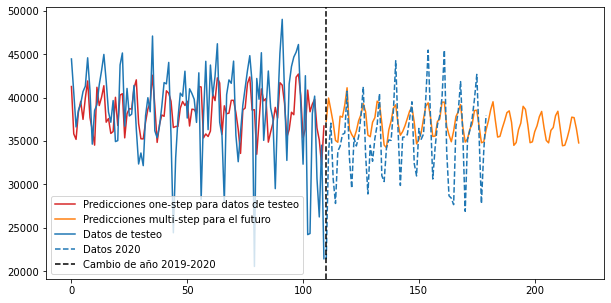

In [29]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,110),test_predict[0:110],color='tab:red',label='Predicciones one-step para datos de testeo')
plt.plot(np.arange(110,110+look_back),test_predict[110:],color='tab:orange',label='Predicciones multi-step para el futuro')
plt.plot(np.arange(0,110),testY,color='tab:blue',label='Datos de testeo')
plt.plot(np.arange(110,180),diario2.cantidad_pasos[1095:1165].values,color='tab:blue',ls='--', label='Datos 2020')
plt.axvline(x=110, ymin=0, ymax=60000, color='black',ls='--',label='Cambio de año 2019-2020')
plt.plot()
plt.legend()
plt.show()

Efectivamente, puede observarse que la red generada es muy conservadora, y si bien hace una predicción razonable, se equivoca particularmente en aquellos días con picos de tránsito (viernes) o con reducida circulación (domingos).

#### **Modelo RNN (*Recurrent Neural Network*)**

Una RNN es tipo de red neuronal que están diseñadas para procesar datos secuenciales (como una serie de tiempo, por ejemplo), ya que además incluyen memoria interna. La naturaleza recurrente se relaciona con el hecho de que el *output* depende del valor que se computó previamente para otro *input*. Una vez que se produce el *output*, se copia y se envía nuevamente hacia atrás en la red. Para tomar una decisión, se consideran tanto el *input* actual como el *output* que se obtuvo para el *input* anteriores. Esta propiedad de que los *inputs* se relacionan entre sí, hace a las RNNs buenos modelos para el caso de una serie de tiempo.

En primer lugar, se vuelve a preparar a los datos de entrenamiento y de testeo, con el formato que se comentó previamente. Sin embargo, en este caso el formato de *input* para la red debe ser de 3 dimensiones, una por cada uno de los siguientes:

- muestras: cada secuencia de registros de la serie de tiempo es una muestra.
- *window size*: el número de registros (*time steps*) dentro de cada muestra.
- *features*: el número de observaciones realizadas para cada *time step*, es decir, el número de variables.

En este caso, las muestras serán las que surjan como resultado de la partición de los datos de *train* y *test*, el número de *features* es 1 (sólo se alimenta al modelo con la cantidad de pasos diarios), y el *window size* se fija en 110 (cuántos días antes son tenidos en cuenta por el modelo para efectuar la predicción *one-step*, es decir, el *look back*).

In [30]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,])
        Y.append(data_arr[d,])
    return np.array(X), np.array(Y)

In [31]:
train_size = round(1095*0.799)
train,test = diario.values[0:train_size,:], diario.values[train_size:len(diario.values),:]
look_back = 110
test = np.append(test,np.repeat(test[-1,], look_back))
train = np.append(train,np.repeat(train[-1,],look_back))
trainX,trainY =convert2matrix(train,look_back)
testX,testY =convert2matrix(test, look_back)

# Se hace un reshape del input para que sus dimensiones sean [muestras, features, window size]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Análogamente a lo realizado previamente, se define una función para crear una red neuronal con tres capas, definiéndose el *input_shape* según lo comentado previamente (*features*,*window size*), y luego se crea y entrena el modelo. Esta celda se deja comentada, y la siguiente corresponde a la carga del modelo previamente creado, así como al correspondiente objeto *history*.

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping

def model_rnn(look_back):
    model=Sequential()
    model.add(SimpleRNN(units=32, input_shape=(1,look_back), activation="relu"))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [33]:
# model=model_rnn(look_back)

# history=model.fit(trainX,trainY, epochs=100, batch_size=30, verbose=0,
#                   validation_data=(testX,testY),
#                   callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
#                   shuffle=False)

In [34]:
# Se carga archivo json y se crea el modelo

from tensorflow.keras.models import model_from_json

json_file = open('modelRNN.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# Se cargan los pesos al modelo
model.load_weights("modelRNN.h5")
print("Se cargó el modelo")

model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
print("Se compiló el archivo")

# Se carga el objeto history para recuperar los valores de loss y val_loss
# que habían sido generados al entrenarse el modelo.

import pickle

history = pickle.load(open('trainHistoryDictRNN', "rb"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Se cargó el modelo
Se compiló el archivo


Se efectúa la predicción correspondiente, y se calculan los valores de RMSE para el ajuste de los datos de entrenamiento y las predicciones para los datos de testeo. Se observa que los valores de RMSE obtenidos son similares a los correspondientes al modelo DNN, por lo que el poder predictivo de esta herramienta con memoria interna no altera significativamente el rendimiento del modelo en estas predicciones.

Asimismo, se grafica la curva de aprendizaje del modelo, tanto para *train* como para *test*.

Train Root Mean Squared Error(RMSE): 5276.686253772763
Train Mean Absolute Error(MAE): 3685.7340245535715
Test Root Mean Squared Error(RMSE): 5052.668078417461
Test Mean Absolute Error(MAE): 3979.606756036932


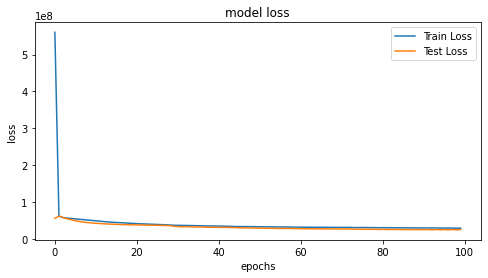

In [35]:
from tensorflow.keras.losses import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error


train_predict = model.predict(trainX)
test_predict = model.predict(testX)

rmse_train = mean_squared_error(trainY, train_predict[:,0], squared=False)
mae_train = mean_absolute_error(trainY, train_predict[:,0])

rmse_test = mean_squared_error(testY, test_predict[:,0], squared=False)
mae_test = mean_absolute_error(testY, test_predict[:,0])

print('Train Root Mean Squared Error(RMSE): {}'.format(rmse_train))
print('Train Mean Absolute Error(MAE): {}'.format(mae_train))

print('Test Root Mean Squared Error(RMSE): {}'.format(rmse_test))
print('Test Mean Absolute Error(MAE): {}'.format(mae_test))

model_loss(history)

Finalmente, se grafican las predicciones y los datos de testeo, para poder analizar visualmente cómo resultaron las predicciones *one-step* del modelo RNN. En líneas generales, no se ven grandes diferencias en el patrón predictivo de la RNN en comparación a la DNN.

In [36]:
def prediction_plot(testY, test_predict,look_back):
    len_prediction=[x for x in range(len(testY)-look_back)]
    plt.figure(figsize=(8,4))
    plt.plot(len_prediction, testY[:len(len_prediction)], marker='.', label="Real")
    plt.plot(len_prediction, test_predict[:len(len_prediction)], 'r', label="Predicción")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Cantidad de pasos diaria', size=15)
    plt.xlabel('Tiempo (días)', size=15)
    plt.legend(fontsize=15)
    plt.show()

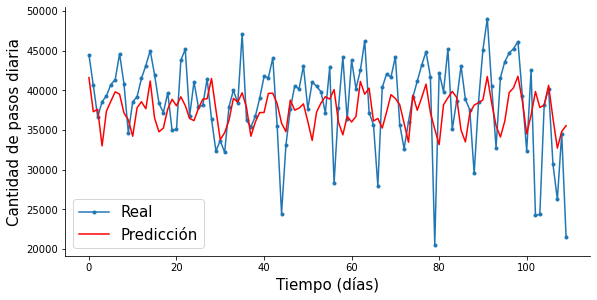

In [37]:
prediction_plot(testY, test_predict , look_back)

Código utilizado para guardar el modelo generado y su correspondiente objeto *history*:

In [38]:
# model_json = model.to_json()
# with open("modelRNN.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("modelRNN.h5")
# print("Saved model to disk")

In [39]:
# import pickle

# with open('trainHistoryDictRNN', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)

#### **Modelo LSTM (*Long Short-Term Memory)**

Las RNNs tienen un problema de memoria a corto plazo: si la secuencia (*window size*) es lo suficientemente larga, presentan dificultades para asociar información entre los primeros y últimos *time steps* (se da un problema en el entrenamiento conocido como *vanishing gradient problem* durante la *back propagation*). Las LSTMs son un tipo particular de RNNs que mejoran este aspecto, ya que tienen mecanismos internos (*gates*) que regulan el flujo de información y permiten a la red "aprender" qué información es relevante para conservar u olvidar durante el proceso de entrenamiento.

- *forget gate*: decide qué información es relevante para recordar de pasos previos.
- *input gate*: determina qué información es relevante para añadir del paso actual.
- *output gate*: decide cuál será el próximo estado oculto (*hidden state*), con información de los pasos previos.

En este caso, se hace un proceso similar al efectuado para la RNN, pero en este caso se pre-procesan los datos recurriendo a un escalado *MinMaxScaler*, ya la las LTSMs son muy sensibles a la escala de los datos.

In [40]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,])
        Y.append(data_arr[d,])
    return np.array(X), np.array(Y)

In [41]:
from sklearn.preprocessing import MinMaxScaler
#create numpy.ndarray
diario_arr= diario.values 
diario_arr.astype(dtype='float32')
diario_arr = np.reshape(diario_arr, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1)) #escalado de los datos
diario_arr = scaler.fit_transform(diario_arr)

Se separaron los datos en *train* y *test*, y se ajustó el período de *look_back*, que demostró ser para LTSM particularmente sensible. Se probó manualmente variando el *look_back* con valores 7, 14, 21, 28, 35 y 110 días. La mejor curva de aprendizaje y el mejor RMSE para los datos de testeo se obtuvo con un *look_back* de 28 días (es decir, cuando el modelo predice el tránsito del día siguiente utilizando los datos de los 28 días anteriores - 4 semanas-, tomando en cuenta la variación semanal en el flujo de tránsito, pero también el contexto del mes). Más abajo se detallan los valores de RMSE obtenidos para los datos de testeo con los distintos valores de *look_back*.

In [42]:
train_size = round(1095*0.799)
test_size = len(diario_arr) - train_size
train, test = diario_arr[0:train_size,:], diario_arr[train_size:len(diario_arr),:]
look_back = 28
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

# Se hace un reshape del input para que sus dimensiones sean [muestras, features, window size]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
def model_lstm(look_back):
    model=Sequential()
    model.add(LSTM(100, input_shape=(1, look_back), activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

Se crea el modelo y se lo entrena. Se define *epochs*=100 para que los datos de entrenamiento pasen 100 veces a través de la red, y *batch_size*=32 para que los datos pasen por la red de a grupos de 32 muestras. Cada *batch* entrena a la red en orden sucesivo, tomando en cuenta los pesos de la red que fueron modificados a partir del entrenamiento con el *batch* precedente. Encontré que para un número de muestras similar al que tiene este *dataset*, 32 es un número apropiado y más o menos estándar. 

La celda a continuación se deja comentada, y se carga el modelo previamente entrenado.

In [44]:
# model=model_lstm(look_back)
# history = model.fit(trainX, trainY, epochs=100, batch_size=32,
#                     validation_data=(testX, testY),
#                     callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
#                     verbose=0, shuffle=False)

In [45]:
# Se carga archivo json y se crea el modelo

from tensorflow.keras.models import model_from_json

json_file = open('modelLSTM.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# Se cargan los pesos al modelo
model.load_weights("modelLSTM.h5")
print("Se cargó el modelo")

model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
print("Se compiló el archivo")

# Se carga el objeto history para recuperar los valores de loss y val_loss
# que habían sido generados al entrenarse el modelo.

import pickle

history = pickle.load(open('trainHistoryDictLSTM', "rb"))

Se cargó el modelo
Se compiló el archivo


In [46]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Se invierten las predicciones, "deshaciendo" el escalado de los datos.
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform(trainY.reshape(-1,1))
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform(testY.reshape(-1,1))

Una vez más, se crea una función para graficar la curva de aprendizaje, es decir, las mejoras en la métrica elegida conforme aumenta el número de epoch (ciclo de entrenamiento de la red). La función comentada es la que se usó para la ejecución del código de novo, mientras que la restante está levenmente modificada para su uso a partir de la carga del modelo previamente guardado.

In [47]:
# def model_loss(history):
#     plt.figure(figsize=(8,4))
#     plt.plot(history.history['loss'], label='Train Loss')
#     plt.plot(history.history['val_loss'], label='Test Loss')
#     plt.title('model loss')
#     plt.ylabel('loss')
#     plt.xlabel('epochs')
#     plt.legend(loc='upper right')
#     plt.show();

In [48]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history['loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

Se calculan los valores de RMSE y MAE, y se grafica la curva de aprendizaje del modelo para los datos de entrenamiento y de testeo.

Train Root Mean Squared Error(RMSE): 8684.677749576096
Train Mean Absolute Error(MAE): 7142.117129851682
Test Root Mean Squared Error(RMSE): 4605.568957985439
Test Mean Absolute Error(MAE): 3513.8527018229165


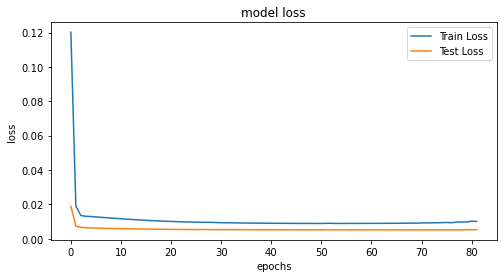

In [49]:
rmse_train = mean_squared_error(trainY, train_predict[:,0], squared=False)
mae_train = mean_absolute_error(trainY, train_predict[:,0])

rmse_test = mean_squared_error(testY, test_predict[:,0], squared=False)
mae_test = mean_absolute_error(testY, test_predict[:,0])

print('Train Root Mean Squared Error(RMSE): {}'.format(rmse_train))
print('Train Mean Absolute Error(MAE): {}'.format(mae_train))

print('Test Root Mean Squared Error(RMSE): {}'.format(rmse_test))
print('Test Mean Absolute Error(MAE): {}'.format(mae_test))

model_loss(history)

In [50]:
def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY, marker='.', label="Real")
      plt.plot(len_prediction, test_predict, 'r', label="Predicción")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Cantidad de pasos diaria', size=15)
      plt.xlabel('Tiempo (días)', size=15)
      plt.legend(fontsize=15)
      plt.show();

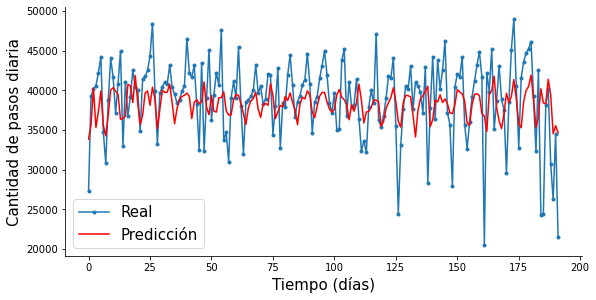

In [51]:
prediction_plot(testY, test_predict)

Tal como se mencionó anteriormente, a continuación se muestran los valores de **RMSE test** según elección de período de *look_back* (análisis efectuado manualemente):

- 7 días: 5.163
- 14 días: 5.052
- 21 días: 4.946
- 28 días: 4.605
- 35 días: 6.836
- 110 días: 9.300

Se observa que se obtuvo el mejor valor para el caso de *look_back*=28. 

En forma comparativa con los modelos de DNN y RNN, se obtuvo un mejor valor de RMSE para los datos de testeo para la LTSM.

Las dos celdas a continuación contienen el código empleado para guardar el modelo.

In [52]:
# model_json = model.to_json()
# with open("modelLSTM.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("modelLSTM.h5")
# print("Saved model to disk")

In [53]:
# import pickle

# with open('trainHistoryDictLSTM', 'wb') as file_pi:
#         pickle.dump(history.history, file_pi)

#### **Conclusiones**

En el presente *notebook* se efectuó una primera aproximación a una temática compleja como son las redes neuronales. Se probaron 3 tipos diferentes de redes neuronales, para efectuar predicciones *one-step* a partir de una única variable (la cantidad de pasos registrada para una determinada cantidad de días anteriores). En este sentido, hay muchas mejoras que podrían implementarse a futuro para lograr mejores predicciones:

- optimización de hiperparámetros: si bien en este *notebook* se hizo manualmente algún tipo de optimización de hiperparámetros (por ejemplo, como en el caso del *look_back* de la red LSTM), podrían optimizarse una gran cantidad de parámetros que afectarían en forma directa el desempeño del modelo, siendo el más evidente de ellos la propia arquitectura de las redes neuronales (aumentar el número de capas y neuronas, así como las funciones de activación en cada celda, por ejemplo). De todas formas, para implementar en forma exitosa estos ajustes, debería profundizar mucho más en la teoría de las redes neuronales.

- validación cruzada: para generar estos modelos, se entrenó varias veces cada red para evaluarlo posteriormente, y ver cómo la naturaleza estocástica de la asignación inicial de pesos influye en el modelo generado. En la mayor parte de los casos se llegó a un modelo similar, pero hubo situaciones en donde el modelo se comportaba muy diferente, razón por la cual se decidió guardar los modelos y sus pesos, y cargarlos nuevamente en futuras ejecuciones del *notebook*. Un paso adicional que podría hacerse es la validación cruzada con múltiples particiones de *train* y *test*, tal como se ha efectuado en los proyectos anteriores. Sin embargo, al intentar hacerlo enfrenté varias complicaciones matemáticas que me impidieron hacerlo para esta entregas.

Aún considerando, creo que el presente informe permitió una comprensión general de este tema no abordado en detalle en el curso de *Data Science*, y me sirve como punto de partida para profundizar en un futuro. Comparando el desempeño de estos modelos con los modelos generados previamente en el proyecto 3 (SARIMA, Prophet y árboles de decisión), no se observan mejoras sustanciales (de hecho los RMSE para estos datos de testeo son superiores para las redes neuronales en comparación con los otros). A esto hay que sumarle que en este *notebook* se trabajó mayoritariamente con modelos de predicción *one-step* (a excepción de DNN, en donde también se aplicó el modelo de predicción *multi-step* para los datos de 2020). Esto quiere decir que estos modelos de redes, a pesar de estar prediciendo sólo un día hacia adelante, tienden hacerlo con valores de RMSE superiores (es decir, con poder predictivo inferior) en comparación a los otros modelos ensayados en el proyecto 3, en donde se recurría a predicción *multi-step*. En este sentido, una vez efectuado mejoras como la optimización de más hiperparámetros y habiendo efectuado validación cruzada, sería bueno analizar si el modelo resultante es capaz de hacer predicciones *multi-step* con similar grado de error que los modelos del proyecto 3.